In [1]:
from google.colab import files

uploaded = files.upload()

Saving iswc.json to iswc.json


In [2]:
import json

with open('iswc.json', 'r') as file:
     iswc = json.load(file)

## JSON input conversion
### From:
[{"year": year,
  "tkg": link,
  "metrics": [{"metric": metric_name,
               "concepts": [{uri: value},
                            (...)]},
              (...)]},
 (...)]
 
 ### To:
{metric_name: {uri: {year: value,
                     (...)},
               (...)},
 (...)}

In [3]:
all_concepts = set()
all_metrics = set()
all_years = set()

data = dict()

for entry in iswc:
    year = entry['year']
    all_years.add(year)
    for metrics in entry['metrics']:
        metric_name = metrics['metric']
        all_metrics.add(metric_name)
        metric_concepts = metrics['concepts']
        for concept in metric_concepts:
            for key, value in concept.items():
                all_concepts.add(key)
                #print("{} : {} : {} : {} ".format(metric_name, year, key, value))
                curr = {key: {year: value}}
                if metric_name in data.keys():
                    if key in data[metric_name].keys():
                        data[metric_name][key].update(curr[key])
                    else:
                        data[metric_name].update(curr)
                else:
                    data[metric_name] = curr

print('# of concepts: {}'.format(len(all_concepts)))
print('# of metrics: {}'.format(len(all_metrics)))
print('# of editions: {} ({} to {})'.format(len(all_years),\
                                            min(all_years), max(all_years)))

# of concepts: 1042
# of metrics: 12
# of editions: 20 (2002 to 2021)


### Method to create a dataframe for a metric's annual data

In [4]:
import pandas as pd

def create_df(metric=None, verbose=False):
    df = pd.DataFrame(data[metric]).sort_index(ascending=True)
    if verbose:
        print(f'Annual data for {metric}')
        display(df)
    return df

### Method to print the TKGVR for a given metric data

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

def plot_df_heatmap(df, title="", dpi=100, num_lines=len(all_concepts)):
    df_max = df.max()
    df_norm = df / df_max # Normalize
    df_t = df_norm.transpose()
    # Sort by descending amount of NaNs
    df_heat = df_t.iloc[df_t.isnull().sum(axis=1).mul(1).argsort()].head(num_lines)
    plt.figure(figsize=(8, 6), dpi=dpi)
    ax = sns.heatmap(df_heat, yticklabels=num_lines<=50, square=False, cmap='Blues')
    plt.title(title)
    plt.show()

## Print all metric's data and plot their TKGVR

Annual data for degree


,http://local/local.owl#semantic_web,http://local/local.owl#ontology,http://local/local.owl#semantic,http://local/local.owl#semantics,http://local/local.owl#world_wide_web,http://local/local.owl#rdf_data,http://local/local.owl#ontologies,http://local/local.owl#semantic_web_technologies,http://local/local.owl#software,http://local/local.owl#intelligent_software_agents,http://local/local.owl#web_resources,http://local/local.owl#open_source_project,http://local/local.owl#application_layer,http://local/local.owl#knowledge_sharing,http://local/local.owl#internet,http://local/local.owl#web_information,http://local/local.owl#web_services_descriptions,http://local/local.owl#description_logics,http://local/local.owl#inference_engine,http://local/local.owl#web_service_descriptions,http://local/local.owl#web_mining,http://local/local.owl#xml_schema,http://local/local.owl#business_processes,http://local/local.owl#semantic_web_applications,http://local/local.owl#visual_analytics,http://local/local.owl#rdf_graphs,http://local/local.owl#sociology,http://local/local.owl#inference,http://local/local.owl#software_agents,http://local/local.owl#information_retrieval,http://local/local.owl#domain_ontology,http://local/local.owl#ontology_development,http://local/local.owl#xml_data,http://local/local.owl#social_network_analysis,http://local/local.owl#web_services_composition,http://local/local.owl#statistical_analysis,http://local/local.owl#grid_services,http://local/local.owl#resource_description_framework,http://local/local.owl#virtual_communities,http://local/local.owl#peertopeer_network,...,http://local/local.owl#revenue,http://local/local.owl#datamanagement,http://local/local.owl#interpretability,http://local/local.owl#statistic,http://local/local.owl#raster_data,http://local/local.owl#interpreter,http://local/local.owl#classification_model,http://local/local.owl#random_walks,http://local/local.owl#query_optimizer,http://local/local.owl#similar_cases,http://local/local.owl#cold_start_problem,http://local/local.owl#syntactic_structure,http://local/local.owl#search_behaviors,http://local/local.owl#efficient_computation,http://local/local.owl#text_categorization,http://local/local.owl#combinatorial_optimization_problem,http://local/local.owl#classification_approaches,http://local/local.owl#collaborative_filtering,http://local/local.owl#classification_models,http://local/local.owl#steiner_tree,http://local/local.owl#cold_start,http://local/local.owl#search_tasks,http://local/local.owl#data_protection,http://local/local.owl#search_session,http://local/local.owl#gaussian_distributions,http://local/local.owl#privacypreserving,http://local/local.owl#interleave,http://local/local.owl#supervised_classifiers,http://local/local.owl#socialmedia,http://local/local.owl#ontologys,http://local/local.owl#complex_questions,http://local/local.owl#rsa,http://local/local.owl#random_forest,http://local/local.owl#collaborative_filtering_techniques,http://local/local.owl#class_label,http://local/local.owl#digital_information,http://local/local.owl#controlled_vocabulary,http://local/local.owl#personalised_recommendations,http://local/local.owl#contentbased_filtering,http://local/local.owl#neuralnetwork
2002,0.025784,0.008089,0.007078,0.006825,0.006320,0.005814,0.004297,0.003792,0.003539,0.003539,0.003286,0.002781,0.002528,0.002528,0.002528,0.002275,0.002275,0.002275,0.002022,0.002022,0.002022,0.001769,0.001769,0.001769,0.001769,0.001769,0.001769,0.001517,0.001517,0.001517,0.001517,0.001517,0.001517,0.001517,0.001517,0.001517,0.001517,0.001517,0.001517,0.001517,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003,0.014974,NaN,0.006636,0.006806,0.004424,0.000681,NaN,0.001531,0.001021,NaN,0.002722,NaN,NaN,NaN,0.001191,NaN,NaN,0.002212,0.001021,NaN,NaN,NaN,NaN,NaN,NaN,0.000681,NaN,0.001361,NaN,0.001191,0.001021,0.001191,0.000681,NaN,NaN,NaN,NaN,0.001021,NaN,Na

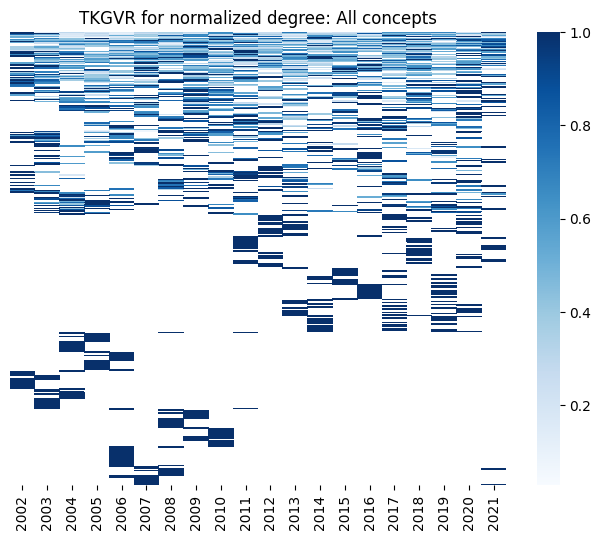

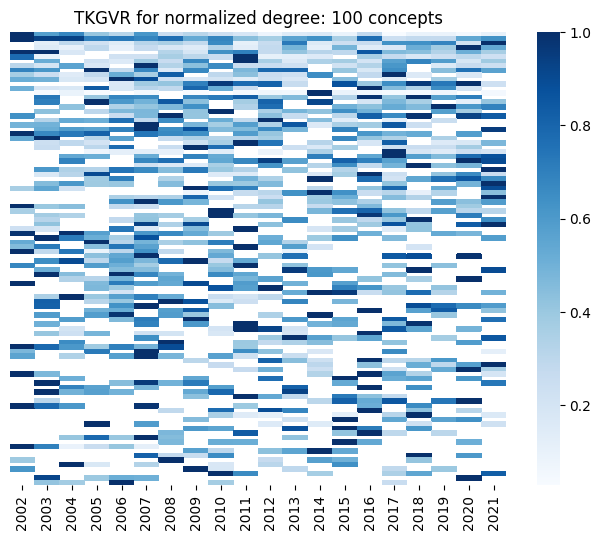

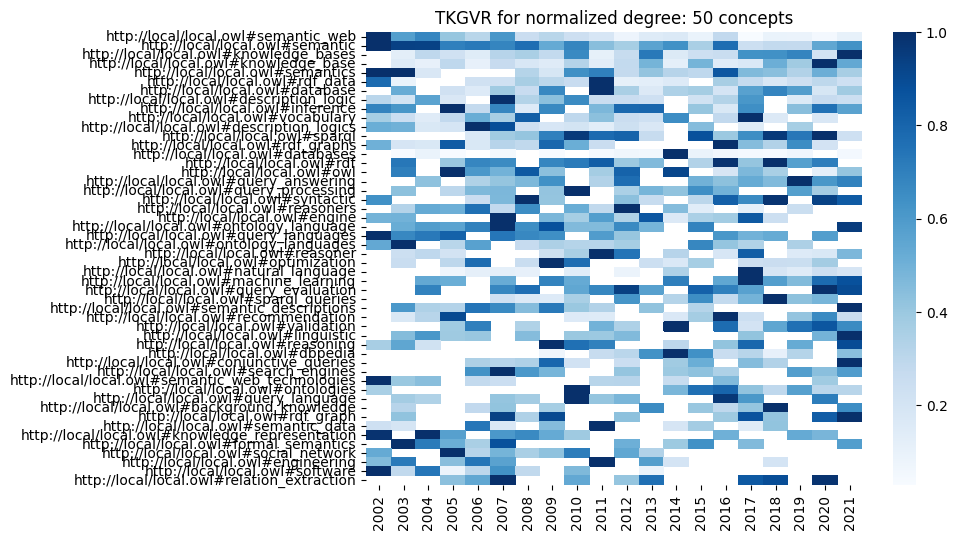

Annual data for indegree


,http://local/local.owl#semantic_web,http://local/local.owl#ontology,http://local/local.owl#semantic,http://local/local.owl#semantics,http://local/local.owl#world_wide_web,http://local/local.owl#rdf_data,http://local/local.owl#ontologies,http://local/local.owl#software,http://local/local.owl#semantic_web_technologies,http://local/local.owl#web_resources,http://local/local.owl#intelligent_software_agents,http://local/local.owl#internet,http://local/local.owl#open_source_project,http://local/local.owl#application_layer,http://local/local.owl#knowledge_sharing,http://local/local.owl#web_information,http://local/local.owl#sociology,http://local/local.owl#description_logics,http://local/local.owl#inference_engine,http://local/local.owl#inference,http://local/local.owl#web_mining,http://local/local.owl#web_services_descriptions,http://local/local.owl#web_service_descriptions,http://local/local.owl#xml_schema,http://local/local.owl#business_processes,http://local/local.owl#visual_analytics,http://local/local.owl#rdf_graphs,http://local/local.owl#software_agents,http://local/local.owl#information_retrieval,http://local/local.owl#b2b,http://local/local.owl#domain_ontology,http://local/local.owl#ontology_development,http://local/local.owl#inferences,http://local/local.owl#semantic_web_applications,http://local/local.owl#xml_data,http://local/local.owl#statistical_analysis,http://local/local.owl#grid_services,http://local/local.owl#xpath,http://local/local.owl#virtual_communities,http://local/local.owl#reasoning,...,http://local/local.owl#datamanagement,http://local/local.owl#interpretability,http://local/local.owl#network_architecture,http://local/local.owl#statistic,http://local/local.owl#interpreter,http://local/local.owl#raster_data,http://local/local.owl#classification_model,http://local/local.owl#random_walks,http://local/local.owl#query_optimizer,http://local/local.owl#similar_cases,http://local/local.owl#syntactic_structure,http://local/local.owl#search_behaviors,http://local/local.owl#efficient_computation,http://local/local.owl#cold_start_problem,http://local/local.owl#text_categorization,http://local/local.owl#privacypreserving,http://local/local.owl#interleave,http://local/local.owl#classification_approaches,http://local/local.owl#collaborative_filtering,http://local/local.owl#classification_models,http://local/local.owl#steiner_tree,http://local/local.owl#combinatorial_optimization_problem,http://local/local.owl#cold_start,http://local/local.owl#search_tasks,http://local/local.owl#data_protection,http://local/local.owl#search_session,http://local/local.owl#socialmedia,http://local/local.owl#gaussian_distributions,http://local/local.owl#ontologys,http://local/local.owl#supervised_classifiers,http://local/local.owl#complex_questions,http://local/local.owl#rsa,http://local/local.owl#random_forest,http://local/local.owl#controlled_vocabulary,http://local/local.owl#neuralnetwork,http://local/local.owl#personalised_recommendations,http://local/local.owl#class_label,http://local/local.owl#digital_information,http://local/local.owl#collaborative_filtering_techniques,http://local/local.owl#contentbased_filtering
2002,0.025025,0.007836,0.006825,0.006572,0.005308,0.005056,0.004044,0.003286,0.002781,0.002528,0.002528,0.002275,0.002022,0.001769,0.001769,0.001517,0.001517,0.001517,0.001264,0.001264,0.001264,0.001264,0.001011,0.001011,0.001011,0.001011,0.001011,0.000758,0.000758,0.000758,0.000758,0.000758,0.000758,0.000758,0.000758,0.000758,0.000758,0.000758,0.000758,0.000758,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003,0.014463,NaN,0.006466,0.006636,0.003743,0.000170,NaN,0.000851,0.000851,0.002212,NaN,0.001021,NaN,NaN,NaN,NaN,NaN,0.001702,0.000510,0.001191,NaN,NaN,NaN,NaN,NaN,NaN,0.000170,NaN,0.000681,NaN,0.000510,0.000681,NaN,NaN,0.000170,NaN,NaN,NaN,NaN,0.001361,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

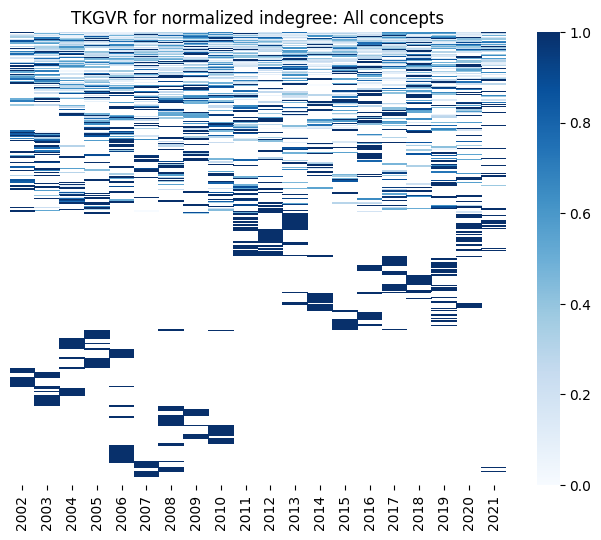

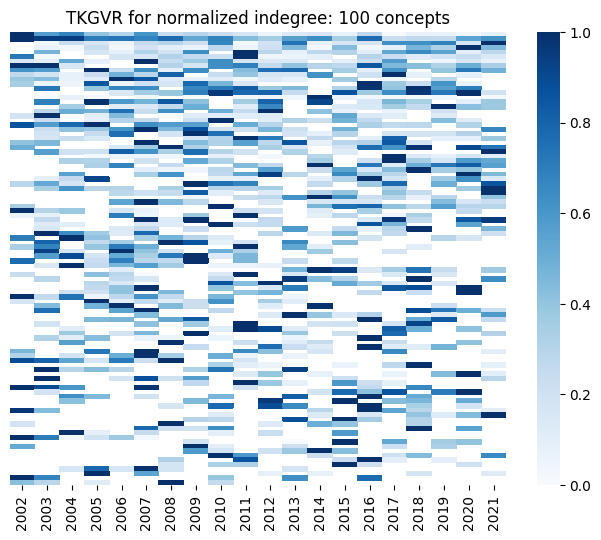

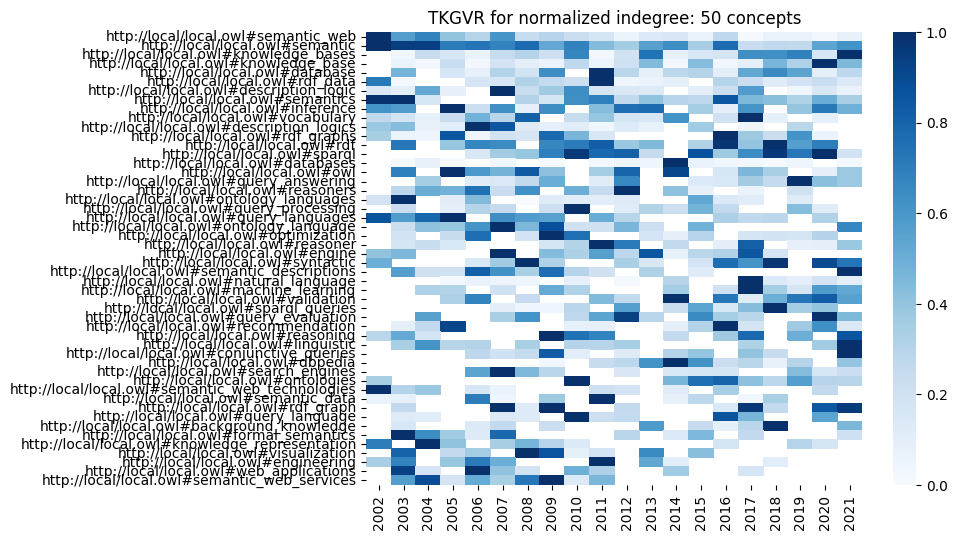

Annual data for outdegree


,http://local/local.owl#web_service_descriptions,http://local/local.owl#semantic_web_applications,http://local/local.owl#social_network_analysis,http://local/local.owl#web_services_composition,http://local/local.owl#world_wide_web,http://local/local.owl#semantic_web_technologies,http://local/local.owl#resource_description_framework,http://local/local.owl#intelligent_software_agents,http://local/local.owl#web_services_descriptions,http://local/local.owl#web_ontology_languages,http://local/local.owl#relational_database_systems,http://local/local.owl#classification_approach,http://local/local.owl#inference_systems,http://local/local.owl#process_model,http://local/local.owl#rdf_data,http://local/local.owl#inference_engine,http://local/local.owl#semantic_web,http://local/local.owl#ontology_engineering,http://local/local.owl#direct_link,http://local/local.owl#web_resources,http://local/local.owl#artificial_intelligence,http://local/local.owl#software_agents,http://local/local.owl#content_providers,http://local/local.owl#information_retrieval,http://local/local.owl#web_information,http://local/local.owl#xml_schema,http://local/local.owl#domain_ontology,http://local/local.owl#services_composition,http://local/local.owl#ontology_development,http://local/local.owl#business_processes,http://local/local.owl#virtual_community,http://local/local.owl#xml_data,http://local/local.owl#description_logic,http://local/local.owl#application_layer,http://local/local.owl#open_source_project,http://local/local.owl#social_network,http://local/local.owl#semantic_interoperability,http://local/local.owl#web_mining,http://local/local.owl#visualization_tools,http://local/local.owl#business_environment,...,http://local/local.owl#revenue,http://local/local.owl#datamanagement,http://local/local.owl#interpretability,http://local/local.owl#statistic,http://local/local.owl#cold_start_problem,http://local/local.owl#combinatorial_optimization_problem,http://local/local.owl#random_walks,http://local/local.owl#query_optimizer,http://local/local.owl#similar_cases,http://local/local.owl#search_behaviors,http://local/local.owl#efficient_computation,http://local/local.owl#classification_approaches,http://local/local.owl#collaborative_filtering,http://local/local.owl#classification_models,http://local/local.owl#classification_model,http://local/local.owl#steiner_tree,http://local/local.owl#text_categorization,http://local/local.owl#raster_data,http://local/local.owl#cold_start,http://local/local.owl#search_tasks,http://local/local.owl#syntactic_structure,http://local/local.owl#data_protection,http://local/local.owl#search_session,http://local/local.owl#gaussian_distributions,http://local/local.owl#supervised_classifiers,http://local/local.owl#interpreter,http://local/local.owl#privacypreserving,http://local/local.owl#socialmedia,http://local/local.owl#interleave,http://local/local.owl#ontologys,http://local/local.owl#collaborative_filtering_techniques,http://local/local.owl#digital_information,http://local/local.owl#complex_questions,http://local/local.owl#class_label,http://local/local.owl#contentbased_filtering,http://local/local.owl#controlled_vocabulary,http://local/local.owl#random_forest,http://local/local.owl#personalised_recommendations,http://local/local.owl#rsa,http://local/local.owl#neuralnetwork
2002,0.001011,0.001011,0.001011,0.001011,0.001011,0.001011,0.001011,0.001011,0.001011,0.001011,0.001011,0.000758,0.000758,0.000758,0.000758,0.000758,0.000758,0.000758,0.000758,0.000758,0.000758,0.000758,0.000758,0.000758,0.000758,0.000758,0.000758,0.000758,0.000758,0.000758,0.000758,0.000758,0.000758,0.000758,0.000758,0.000758,0.000758,0.000758,0.000758,0.000758,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003,NaN,NaN,NaN,NaN,0.000681,0.000681,0.000681,NaN,NaN,0.000681,NaN,NaN,NaN,0.000510,0.000510,0.000510,0.000510,NaN,NaN,0.000510,NaN,NaN,NaN,0.0005

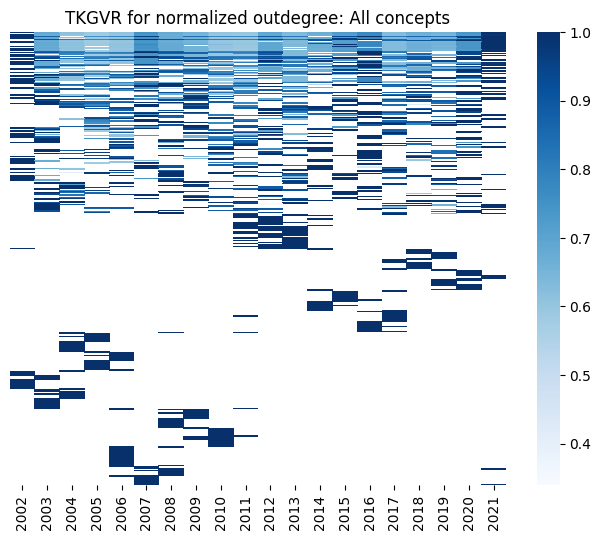

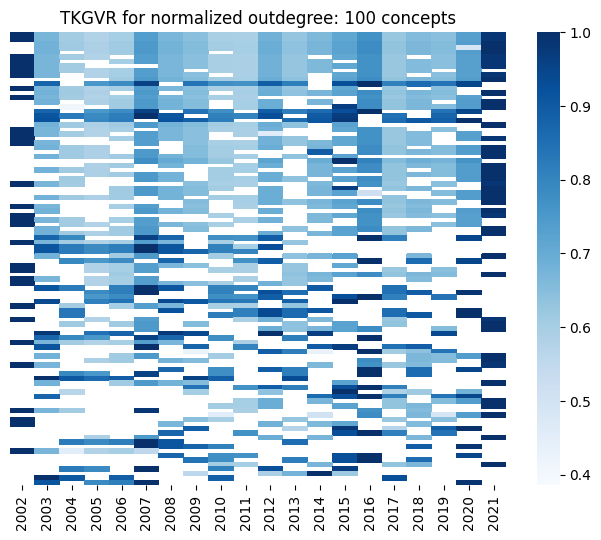

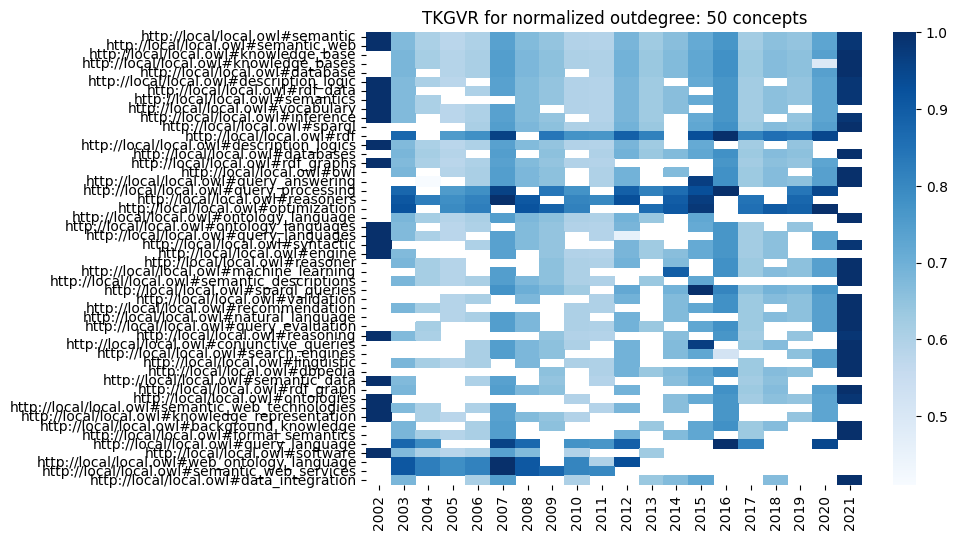

Annual data for pagerank


,http://local/local.owl#semantic_web,http://local/local.owl#semantic,http://local/local.owl#ontology,http://local/local.owl#semantics,http://local/local.owl#world_wide_web,http://local/local.owl#ontologies,http://local/local.owl#rdf_data,http://local/local.owl#software,http://local/local.owl#web_resources,http://local/local.owl#internet,http://local/local.owl#web_mining,http://local/local.owl#inference,http://local/local.owl#intelligent_software_agents,http://local/local.owl#open_source_project,http://local/local.owl#rdf_graphs,http://local/local.owl#application_layer,http://local/local.owl#sociology,http://local/local.owl#semantic_web_technologies,http://local/local.owl#information_retrieval,http://local/local.owl#web_information,http://local/local.owl#reasoning,http://local/local.owl#business_processes,http://local/local.owl#b2b,http://local/local.owl#knowledge_sharing,http://local/local.owl#description_logics,http://local/local.owl#inference_engine,http://local/local.owl#software_agents,http://local/local.owl#web_service_descriptions,http://local/local.owl#domain_ontology,http://local/local.owl#java,http://local/local.owl#engine,http://local/local.owl#xml_schema,http://local/local.owl#communication,http://local/local.owl#haskell,http://local/local.owl#syntactic,http://local/local.owl#worldwide_web,http://local/local.owl#statistical_analysis,http://local/local.owl#grid_services,http://local/local.owl#graphbased,http://local/local.owl#knowledge_representation,...,http://local/local.owl#relational_learning,http://local/local.owl#network_architecture,http://local/local.owl#complex_question,http://local/local.owl#sat_solver,http://local/local.owl#search_behaviors,http://local/local.owl#interpreter,http://local/local.owl#raster_data,http://local/local.owl#query_optimizer,http://local/local.owl#classification_model,http://local/local.owl#random_walks,http://local/local.owl#data_protection,http://local/local.owl#socialmedia,http://local/local.owl#similar_cases,http://local/local.owl#syntactic_structure,http://local/local.owl#efficient_computation,http://local/local.owl#cold_start_problem,http://local/local.owl#privacypreserving,http://local/local.owl#text_categorization,http://local/local.owl#ontologys,http://local/local.owl#gaussian_distributions,http://local/local.owl#interleave,http://local/local.owl#collaborative_filtering,http://local/local.owl#steiner_tree,http://local/local.owl#combinatorial_optimization_problem,http://local/local.owl#classification_models,http://local/local.owl#classification_approaches,http://local/local.owl#cold_start,http://local/local.owl#search_tasks,http://local/local.owl#search_session,http://local/local.owl#supervised_classifiers,http://local/local.owl#complex_questions,http://local/local.owl#class_label,http://local/local.owl#neuralnetwork,http://local/local.owl#rsa,http://local/local.owl#random_forest,http://local/local.owl#digital_information,http://local/local.owl#controlled_vocabulary,http://local/local.owl#personalised_recommendations,http://local/local.owl#collaborative_filtering_techniques,http://local/local.owl#contentbased_filtering
2002,0.005456,0.004724,0.002527,0.001895,0.001352,0.001186,0.001175,0.001148,0.000749,0.000607,0.000539,0.000532,0.000523,0.000486,0.000469,0.000465,0.000449,0.000446,0.000443,0.000435,0.000427,0.000424,0.000418,0.000407,0.000404,0.000372,0.000371,0.000353,0.000344,0.000342,0.000339,0.000333,0.000319,0.000313,0.000313,0.000304,0.000301,0.000301,0.000299,0.000298,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003,0.003434,0.003857,NaN,0.002121,0.000941,NaN,0.000120,0.000282,0.000493,0.000259,NaN,0.000834,NaN,NaN,0.000143,NaN,NaN,0.000187,0.000236,NaN,0.000788,NaN,NaN,NaN,0.000372,0.000152,NaN,NaN,0.000205,NaN,0.000394,NaN,0.000157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

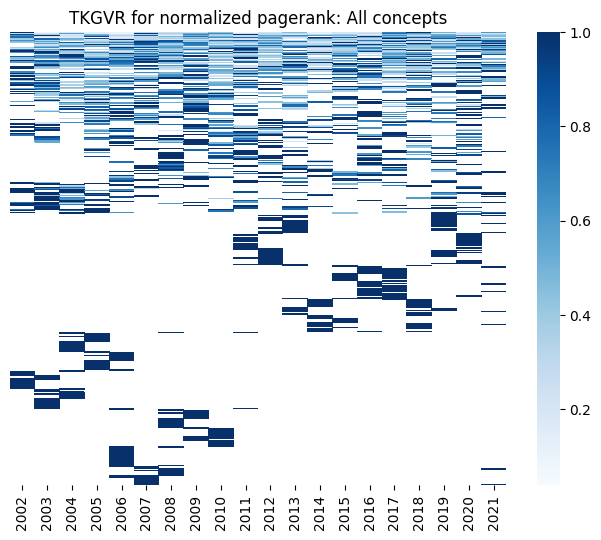

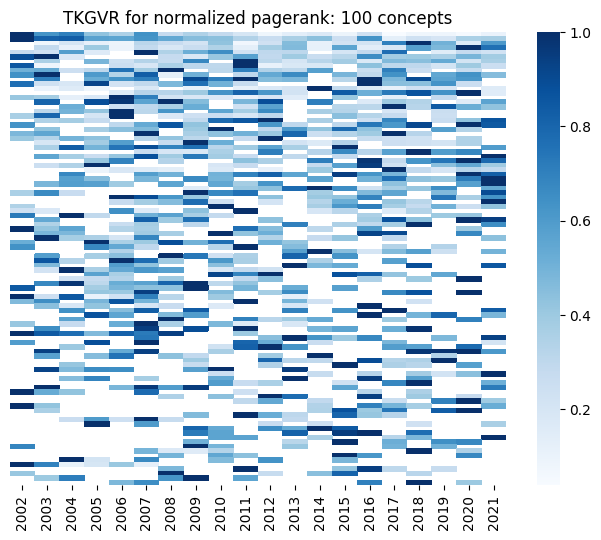

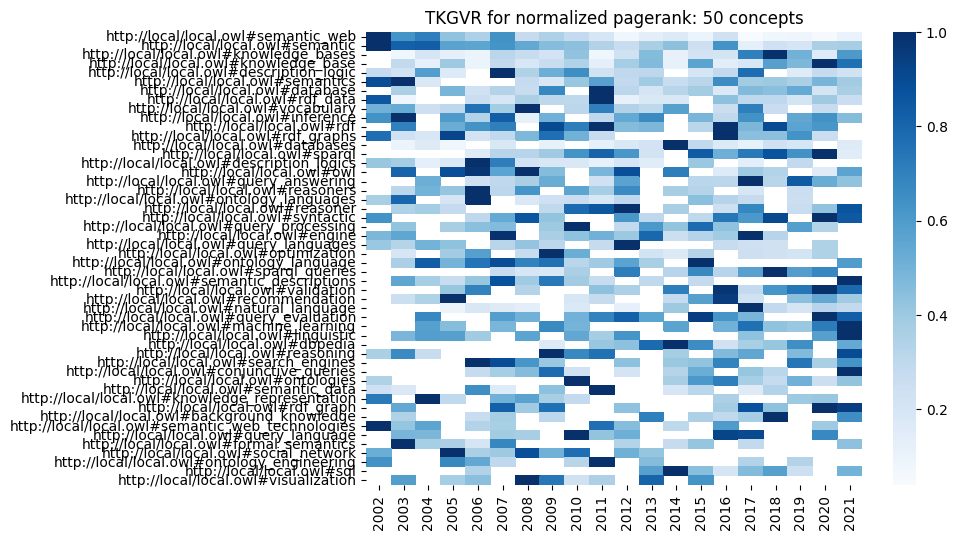

Annual data for load


,http://local/local.owl#semantic_web,http://local/local.owl#semantic,http://local/local.owl#world_wide_web,http://local/local.owl#intelligent_software_agents,http://local/local.owl#rdf_data,http://local/local.owl#ontology,http://local/local.owl#semantic_web_technologies,http://local/local.owl#software,http://local/local.owl#open_source_project,http://local/local.owl#semantics,http://local/local.owl#worldwide_web,http://local/local.owl#web_service_descriptions,http://local/local.owl#web_resources,http://local/local.owl#business_processes,http://local/local.owl#web_services_descriptions,http://local/local.owl#software_agents,http://local/local.owl#web_information,http://local/local.owl#inference_engine,http://local/local.owl#resource_description_framework,http://local/local.owl#ontologies,http://local/local.owl#semantic_web_applications,http://local/local.owl#web_mining,http://local/local.owl#web_ontology_languages,http://local/local.owl#semantic_web_technologiesthe,http://local/local.owl#application_layer,http://local/local.owl#domain_ontology,http://local/local.owl#description_logics,http://local/local.owl#knowledge_sharing,http://local/local.owl#ontology_development,http://local/local.owl#rdf_graphs,http://local/local.owl#web_services_composition,http://local/local.owl#xml_schema,http://local/local.owl#information_retrieval,http://local/local.owl#xml_data,http://local/local.owl#visual_analytics,http://local/local.owl#inference,http://local/local.owl#social_network_analysis,http://local/local.owl#internet,http://local/local.owl#knowledge_representation,http://local/local.owl#reasoning,...,http://local/local.owl#computing_systems,http://local/local.owl#integrate_data,http://local/local.owl#sat_solver,http://local/local.owl#datamanagement,http://local/local.owl#cold_start_problem,http://local/local.owl#data_protection,http://local/local.owl#raster_data,http://local/local.owl#syntactic_structure,http://local/local.owl#query_optimizer,http://local/local.owl#random_walks,http://local/local.owl#interpreter,http://local/local.owl#search_behaviors,http://local/local.owl#classification_model,http://local/local.owl#cold_start,http://local/local.owl#text_categorization,http://local/local.owl#similar_cases,http://local/local.owl#socialmedia,http://local/local.owl#combinatorial_optimization_problem,http://local/local.owl#efficient_computation,http://local/local.owl#classification_models,http://local/local.owl#gaussian_distributions,http://local/local.owl#steiner_tree,http://local/local.owl#ontologys,http://local/local.owl#collaborative_filtering,http://local/local.owl#classification_approaches,http://local/local.owl#search_tasks,http://local/local.owl#search_session,http://local/local.owl#privacypreserving,http://local/local.owl#interleave,http://local/local.owl#supervised_classifiers,http://local/local.owl#complex_questions,http://local/local.owl#personalised_recommendations,http://local/local.owl#collaborative_filtering_techniques,http://local/local.owl#class_label,http://local/local.owl#neuralnetwork,http://local/local.owl#rsa,http://local/local.owl#contentbased_filtering,http://local/local.owl#digital_information,http://local/local.owl#random_forest,http://local/local.owl#controlled_vocabulary
2002,0.000051,0.000024,1.807173e-05,0.000008,7.094474e-06,0.000006,5.656405e-06,3.834851e-06,0.000004,3.675065e-06,0.000003,0.000003,3.099838e-06,3.067881e-06,0.000003,2.812224e-06,0.000002,2.173082e-06,2.173082e-06,0.000002,2.045254e-06,2.045254e-06,2.013297e-06,0.000002,0.000002,1.853511e-06,1.725683e-06,1.661769e-06,1.533940e-06,1.533940e-06,0.000001,1.438069e-06,1.406112e-06,1.150455e-06,1.150455e-06,1.022627e-06,1.022627e-06,9.587127e-07,9.587127e-07,8.308844e-07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003,0.000026,0.000014,7.528975e-06,NaN,2.027032e-07,NaN,1.158304e-06,4.633216e-07,NaN,3.561784e-06,NaN,NaN,2.041511e-0

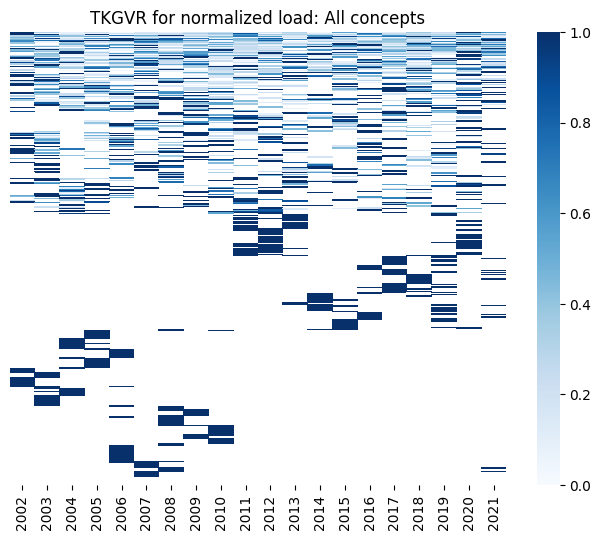

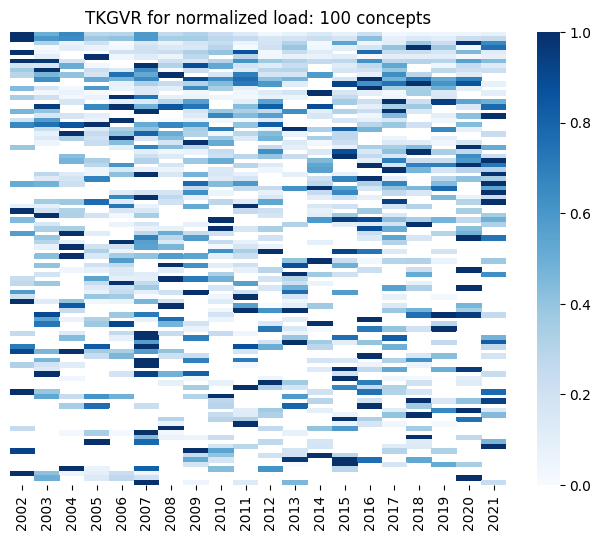

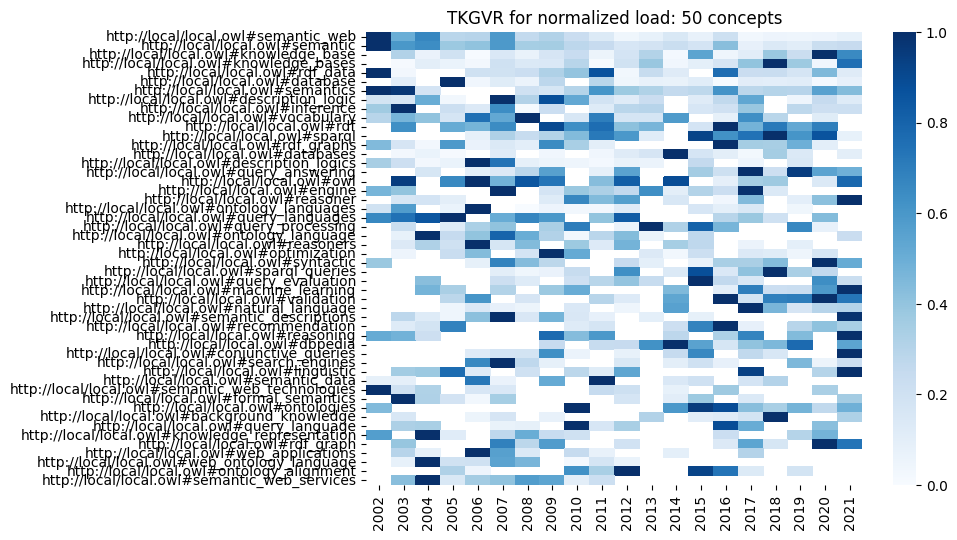

Annual data for harmonic


,http://local/local.owl#semantic,http://local/local.owl#semantic_web,http://local/local.owl#ontology,http://local/local.owl#semantics,http://local/local.owl#world_wide_web,http://local/local.owl#software,http://local/local.owl#rdf_data,http://local/local.owl#ontologies,http://local/local.owl#web_resources,http://local/local.owl#intelligent_software_agents,http://local/local.owl#software_agents,http://local/local.owl#internet,http://local/local.owl#web_information,http://local/local.owl#web_mining,http://local/local.owl#open_source_project,http://local/local.owl#semantic_web_technologies,http://local/local.owl#inference,http://local/local.owl#business_processes,http://local/local.owl#worldwide_web,http://local/local.owl#application_layer,http://local/local.owl#sociology,http://local/local.owl#knowledge_sharing,http://local/local.owl#description_logics,http://local/local.owl#web_services_descriptions,http://local/local.owl#inference_engine,http://local/local.owl#web_service_descriptions,http://local/local.owl#xml_schema,http://local/local.owl#reasoning,http://local/local.owl#engine,http://local/local.owl#b2b,http://local/local.owl#rdf_graphs,http://local/local.owl#domain_ontology,http://local/local.owl#java,http://local/local.owl#information_retrieval,http://local/local.owl#visual_analytics,http://local/local.owl#ontology_development,http://local/local.owl#inferences,http://local/local.owl#xml_data,http://local/local.owl#resource_description_framework,http://local/local.owl#xpath,...,http://local/local.owl#graphbased_representation,http://local/local.owl#datamanagement,http://local/local.owl#integrate_data,http://local/local.owl#sat_solver,http://local/local.owl#interpreter,http://local/local.owl#raster_data,http://local/local.owl#data_protection,http://local/local.owl#socialmedia,http://local/local.owl#query_optimizer,http://local/local.owl#text_categorization,http://local/local.owl#classification_model,http://local/local.owl#random_walks,http://local/local.owl#syntactic_structure,http://local/local.owl#similar_cases,http://local/local.owl#classification_models,http://local/local.owl#gaussian_distributions,http://local/local.owl#search_behaviors,http://local/local.owl#cold_start_problem,http://local/local.owl#ontologys,http://local/local.owl#cold_start,http://local/local.owl#efficient_computation,http://local/local.owl#steiner_tree,http://local/local.owl#combinatorial_optimization_problem,http://local/local.owl#classification_approaches,http://local/local.owl#privacypreserving,http://local/local.owl#interleave,http://local/local.owl#collaborative_filtering,http://local/local.owl#search_tasks,http://local/local.owl#search_session,http://local/local.owl#supervised_classifiers,http://local/local.owl#complex_questions,http://local/local.owl#rsa,http://local/local.owl#neuralnetwork,http://local/local.owl#random_forest,http://local/local.owl#personalised_recommendations,http://local/local.owl#class_label,http://local/local.owl#digital_information,http://local/local.owl#contentbased_filtering,http://local/local.owl#controlled_vocabulary,http://local/local.owl#collaborative_filtering_techniques
2002,162.301190,158.104762,58.833333,40.916667,33.150000,30.500000,28.833333,23.833333,13.333333,12.5,11.166667,11.166667,10.333333,10.0,10.0,10.000000,9.833333,9.666667,9.416667,9.333333,8.666667,8.0,7.500000,7.0,6.833333,6.666667,6.666667,6.450000,6.166667,6.083333,5.833333,5.666667,5.166667,5.083333,5.0,4.500000,4.500000,4.500000,4.500000,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003,215.166667,156.816667,NaN,76.950000,33.000000,9.666667,1.500000,NaN,19.000000,NaN,NaN,9.083333,NaN,NaN,NaN,5.000000,39.400000,NaN,NaN,NaN,NaN,NaN,12.500000,NaN,3.000000,NaN,NaN,15.166667,11.500000,NaN,4.833333,4.000000,NaN,7.333333,NaN,6.500000,NaN,3.166667,2.500000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

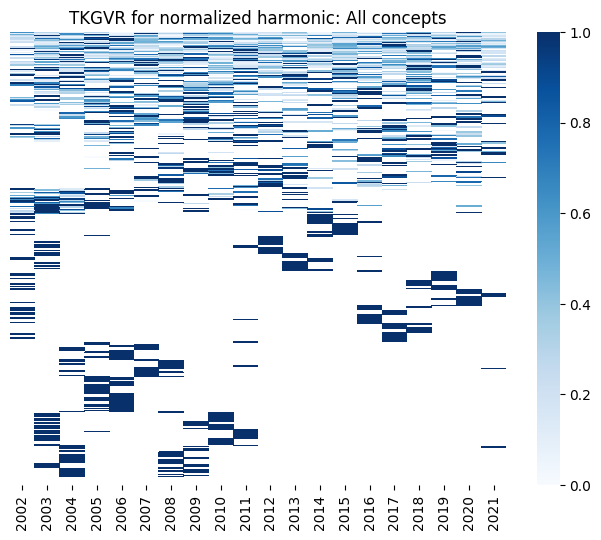

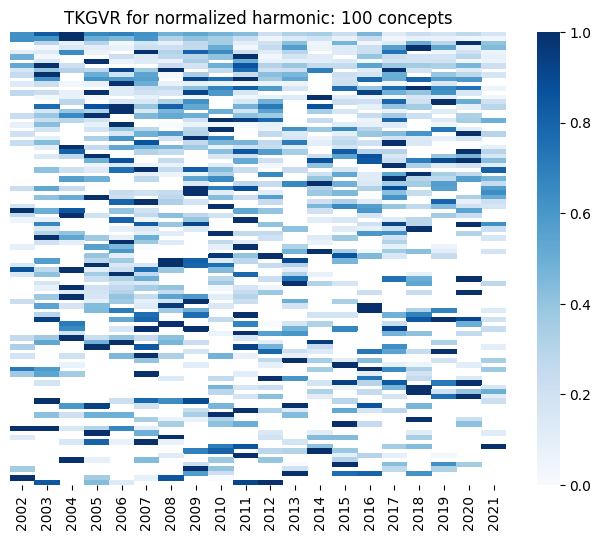

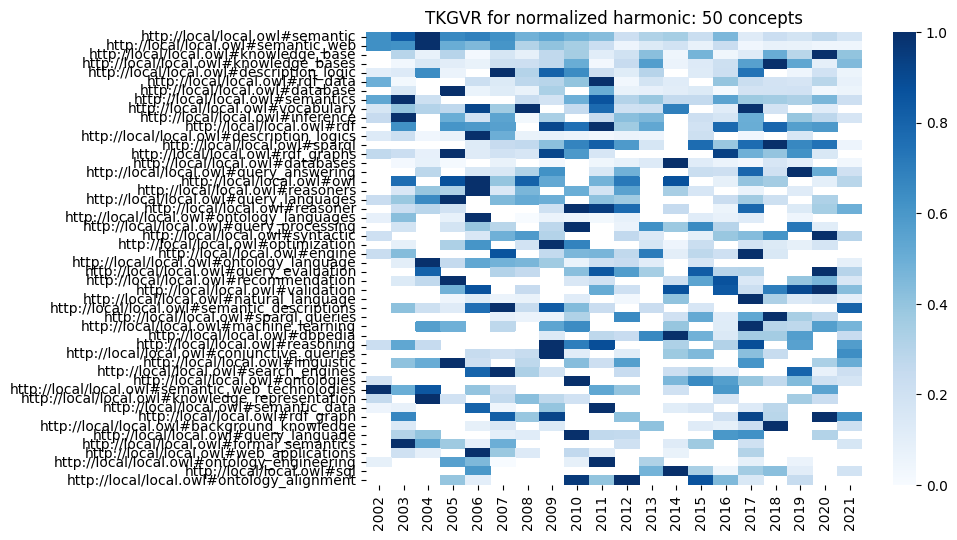

In [6]:
for metric in ['degree', 'indegree', 'outdegree', 'pagerank', 'load', 'harmonic']:
    df = create_df(metric=metric, verbose=True)

    plot_df_heatmap(df, title=f'TKGVR for normalized {metric}: All concepts')
    plot_df_heatmap(df, title=f'TKGVR for normalized {metric}: 100 concepts', num_lines=100)
    plot_df_heatmap(df, title=f'TKGVR for normalized {metric}: 50 concepts', num_lines=50)

### Method to plot a series

In [7]:
def plot_series(df, x, y, breakpoints=[], title="", xlabel='Year', ylabel='Value', hline_origin=None, dpi=100, type='line'):
    plt.figure(figsize=(12,5), dpi=dpi)
    if type == 'bar':
        plt.bar(x, y)
    else:
        plt.plot(x, y, 'o-')
        plt.grid()
    for i in breakpoints:
        plt.axvline(i, color='red', linestyle='dashed')
    if hline_origin != None:
        plt.axhline(y=0.0, color=hline_origin, linestyle='-')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

## Print a series that describes a given concept evolution over the years, considering a specific metric

In [8]:
metric_of_interest = "pagerank"
concept_of_interest = 'http://local/local.owl#semantic_web'

metric_df = create_df(metric=metric_of_interest)
concept_series = metric_df[concept_of_interest]
display(concept_series)

2002    0.005456
2003    0.003434
2004    0.003878
2005    0.002349
2006    0.001924
2007    0.003477
2008    0.001508
2009    0.001906
2010    0.001552
2011    0.001082
2012    0.000428
2013    0.000745
2014    0.000938
2015    0.000516
2016    0.001271
2017    0.000214
2018    0.000433
2019    0.000475
2020    0.000295
2021    0.000577
Name: http://local/local.owl#semantic_web, dtype: float64

In [9]:
concept_series.describe()

count    20.000000
mean      0.001623
std       0.001435
min       0.000214
25%       0.000505
50%       0.001177
75%       0.002031
max       0.005456
Name: http://local/local.owl#semantic_web, dtype: float64

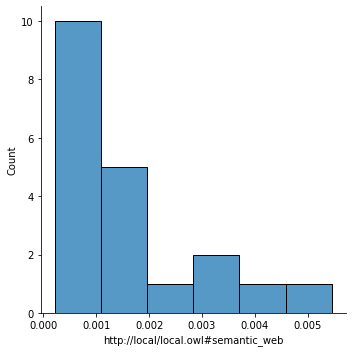

In [10]:
sns.displot(concept_series)

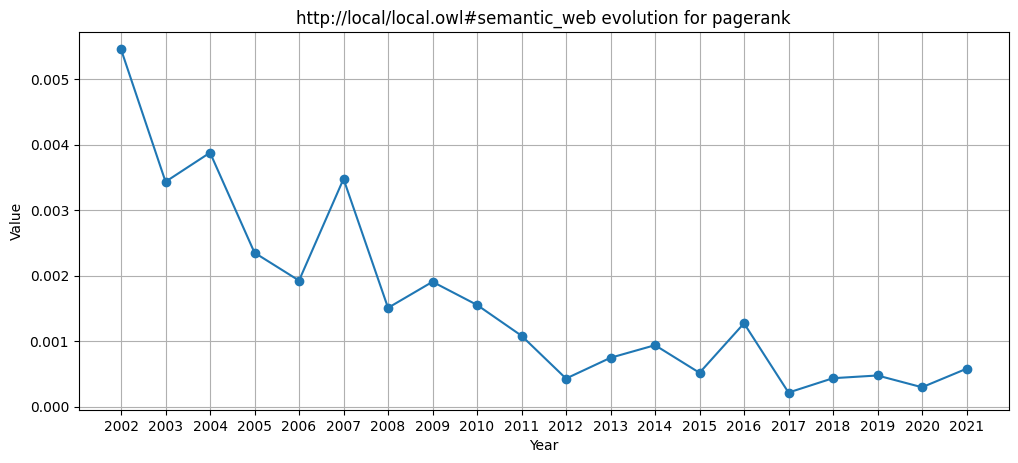

Max. value on 2002: 0.00545603696914482
Min. value on 2017: 0.0002136996789535521


In [11]:
plot_series(concept_series, x=concept_series.index, y=concept_series.values,\
        title='{} evolution for {}'.format(concept_of_interest, metric_of_interest))

print(f'Max. value on {concept_series.idxmax()}: {concept_series.loc[concept_series.idxmax()]}')
print(f'Min. value on {concept_series.idxmin()}: {concept_series.loc[concept_series.idxmin()]}')

# Series analysis

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

analysis = concept_series.fillna(0).copy()
analysis_decomposition = seasonal_decompose(analysis, freq=5, extrapolate_trend='freq')
analysis.describe()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


count    20.000000
mean      0.001623
std       0.001435
min       0.000214
25%       0.000505
50%       0.001177
75%       0.002031
max       0.005456
Name: http://local/local.owl#semantic_web, dtype: float64

## Determining the trend of a Series

In [13]:
import numpy as np

def trendline(series, order=1):
    if len(set(series)) == 1: # constant data
       return 0

    coeffs = np.polyfit(series.index.values.astype(int), list(series.fillna(0)), order)
    slope = coeffs[-2]
    return float(slope)

def get_trend(series):
    series_slope = trendline(series)
    if series_slope > 0:
        return f'Increasing (slope: {series_slope})'
    elif series_slope < 0:
        return f'Decreasing (slope: {series_slope})' 
    else:
        return f'Neutral (slope: {series_slope})'

Trend: Decreasing (slope: -0.0002071910607088622)


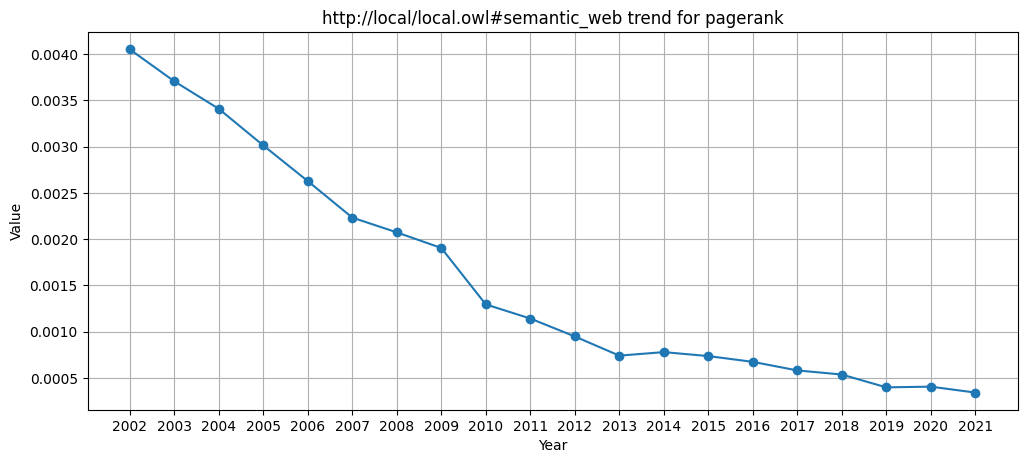

In [14]:
print(f'Trend: {get_trend(analysis)}')

#concept_series_trend = concept_series.fillna(0).rolling(12).mean()
#plot_series(concept_series_trend, x=concept_series_trend.index, y=concept_series_trend.values,\
#        title='{} trend for {}'.format(concept_of_interest, metric_of_interest))

plot_series(analysis_decomposition.trend, x=analysis_decomposition.trend.index, y=analysis_decomposition.trend.values,\
        title='{} trend for {}'.format(concept_of_interest, metric_of_interest))

## Determining the seasonality of a series

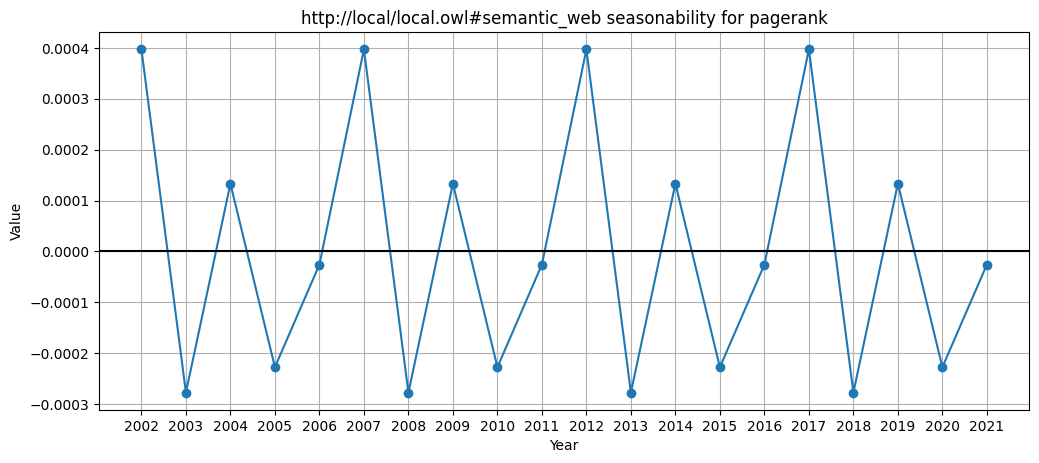

In [15]:
#concept_series_season = concept_series.fillna(0).diff()

#plot_series(concept_series_season, x=concept_series_season.index, y=concept_series_season.values, \
#        hline_origin='black', title='{} seasonability for {}'.format(concept_of_interest, metric_of_interest))

plot_series(analysis_decomposition.seasonal, x=analysis_decomposition.seasonal.index, y=analysis_decomposition.seasonal.values, \
        hline_origin='black', title='{} seasonability for {}'.format(concept_of_interest, metric_of_interest))

### Residual of a series

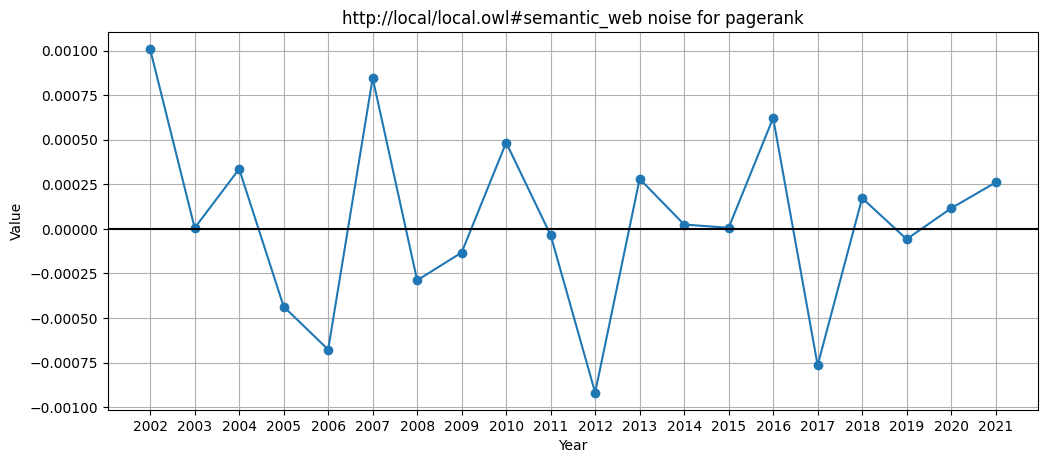

In [16]:
plot_series(analysis_decomposition.resid, x=analysis_decomposition.resid.index, y=analysis_decomposition.resid.values, \
        hline_origin='black', title='{} noise for {}'.format(concept_of_interest, metric_of_interest))

## Detecting breakpoints in a series 

In [17]:
pip install jenkspy

     |████████████████████████████████| 55 kB 2.6 MB/s 
  Created wheel for jenkspy: filename=jenkspy-0.2.0-cp37-cp37m-linux_x86_64.whl size=70400 sha256=d7b070f135ba321278cff36960f8db5b81e4db99df89dde378091e6b95ea515e
  Stored in directory: /root/.cache/pip/wheels/d8/d1/42/9bd05164ef706b84674905892f0542f8db6ac4a652473ca7e0
Successfully built jenkspy


In [18]:
import jenkspy

# From:
# https://medium.com/analytics-vidhya/jenks-natural-breaks-best-range-finder-algorithm-8d1907192051
# https://pbpython.com/natural-breaks.html
def goodness_of_variance_fit(array, classes):
    # get the break points
    classes = jenkspy.jenks_breaks(array, nb_class=classes)

    # do the actual classification
    classified = np.array([classify(i, classes) for i in array])

    # max value of zones
    maxz = max(classified)

    # nested list of zone indices
    zone_indices = [[idx for idx, val in enumerate(classified) if zone + 1 == val] for zone in range(maxz)]

    # sum of squared deviations from array mean
    sdam = np.sum((array - array.mean()) ** 2)

    # sorted polygon stats
    array_sort = [np.array([array[index] for index in zone]) for zone in zone_indices]

    # sum of squared deviations of class means
    sdcm = sum([np.sum((classified - classified.mean()) ** 2) for classified in array_sort])

    # goodness of variance fit
    gvf = (sdam - sdcm) / sdam

    return gvf

def classify(value, breaks):
    for i in range(1, len(breaks)):
        if value < breaks[i]:
            return i
    return len(breaks) - 1

def get_breakpoints(series):
    gvf = 0.0
    nclasses = 2
    while gvf < .8:
        gvf = goodness_of_variance_fit(series.fillna(0), nclasses)
        nclasses += 1

    breaks_values = jenkspy.jenks_breaks(series, nb_class=nclasses)
    breaks = []
    for v in breaks_values:
        if v == 0: # NaN case
            continue
        idx = series.index.values[series == v][0]
        breaks.append(idx)
    return breaks

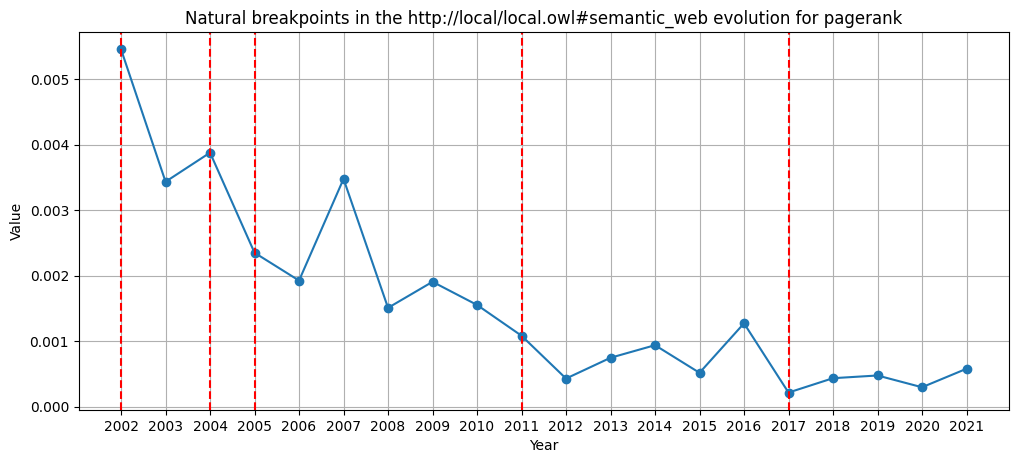

In [19]:
plot_series(concept_series, breakpoints=get_breakpoints(concept_series), x=concept_series.index, y=concept_series.values,\
        title='Natural breakpoints in the {} evolution for {}'.format(concept_of_interest, metric_of_interest))